# IMPORT LIBRARIES

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD TITANIC DATASET

In [ ]:
# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# DATA PREPROCESSING

# SELECT FEATURES

In [ ]:
# Data Preprocessing
# Selecting relevant features
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encoding categorical variable
data['Age'].fillna(data['Age'].median(), inplace=True)  # Filling missing values


<ipython-input-3-0426ca885cb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encoding categorical variable
<ipython-input-3-0426ca885cb7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median()

# SPLIT DATA

In [ ]:
# Splitting data into features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

# TRAIN TEST SPLIT

In [ ]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAIN MODEL

In [ ]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# PREDICTIONS

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# MODEL EVALUATION

In [ ]:
# Model Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



# PERFORMANCE METRICS

In [ ]:
# Accuracy, Precision, Recall, AUC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.80
Precision: 0.78
Recall: 0.73
ROC-AUC: 0.88


# PLOTTING ROC CURVE

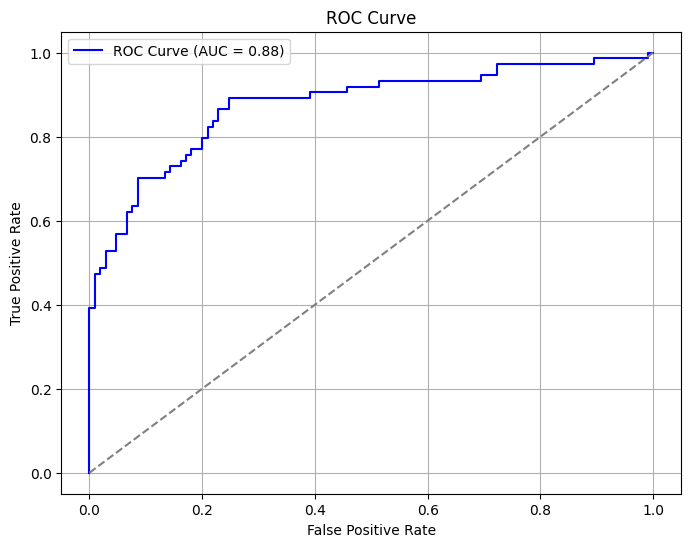

In [ ]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()